# Prophet Prediction 

## Load Data

In [1]:
import os
import pandas as pd 
from fbprophet import Prophet

import plotly.express as px 
import plotly.graph_objs as go
import plotly.io as pio

from dateutil.relativedelta import relativedelta


pio.templates.default = "plotly_white"

print(f"cwd : {os.getcwd()}")

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cwd : /Users/imantha/workspace/cryo-polygen/ts-forecasting


In [2]:
def load_data(path, last_date = "2022-05-18 23:00:00"):
    df = pd.read_excel(path, header = None)
    df.rename(columns = {0 : "y"}, inplace = True)
    last_ts = pd.to_datetime(last_date, format = "%Y-%m-%d %H:%M:%S")
    ts = [last_ts - relativedelta(hours=  x) for x in range(df.shape[0])]
    ts.sort()
    df["ds"] = ts
    return df 



In [3]:
df = load_data(path = os.path.join("data","load.xlsx"))
print(df.shape)
p = px.line(x = df.ds, y = df.y)
p.show()

(4380, 2)


In [4]:
px.histogram(x = df.y, marginal = "violin")

In [5]:
test_size = int(0.3 * df.shape[0])
df_train = df[:-test_size]
df_test = df[-test_size:]

print(f"df_train shape : {df_train.shape}")
print(f"df_test shape : {df_test.shape}")

print(f"Total data, start date : {df.ds.values[0]}, end_date : {df.ds.values[-1]}")
print(f"Training data, start date : {df_train.ds.values[0]}, end_date : {df_train.ds.values[-1]}")
print(f"Testing data, start date : {df_test.ds.values[0]}, end_date : {df_test.ds.values[-1]}")


df_train shape : (3066, 2)
df_test shape : (1314, 2)
Total data, start date : 2021-11-17T12:00:00.000000000, end_date : 2022-05-18T23:00:00.000000000
Training data, start date : 2021-11-17T12:00:00.000000000, end_date : 2022-03-25T05:00:00.000000000
Testing data, start date : 2022-03-25T06:00:00.000000000, end_date : 2022-05-18T23:00:00.000000000


## Predicting Original Time-Series

In [6]:
m = Prophet(interval_width=0.95)
m.fit(df_train)
future = m.make_future_dataframe(periods=test_size, freq = "H")
fcst = m.predict(future)
#m.plot(fcst)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -47.1981
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6470.42    0.00330145       161.665      0.7974     0.07974      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       6477.83    0.00010189       88.3492   6.725e-07       0.001      261  LS failed, Hessian reset 
     199        6478.9    0.00294095       121.448      0.3246           1      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       6480.77    0.00033474        114.19   5.322e-06       0.001      402  LS failed, Hessian reset 
     299       6481.17   0.000409582       72.4673           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6482.79   0.000209492       93.5729      0.5063      0.5063      583   
    Iter      log pro

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [7]:
fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-17 12:00:00,507.655165,341.352165,592.095034,507.655165,507.655165,-38.705135,-38.705135,-38.705135,-76.549898,-76.549898,-76.549898,37.844763,37.844763,37.844763,0.0,0.0,0.0,468.950030
1,2021-11-17 13:00:00,507.783787,333.914687,579.323095,507.783787,507.783787,-45.544608,-45.544608,-45.544608,-83.326742,-83.326742,-83.326742,37.782134,37.782134,37.782134,0.0,0.0,0.0,462.239179
2,2021-11-17 14:00:00,507.912409,347.605399,574.426584,507.912409,507.912409,-48.874639,-48.874639,-48.874639,-86.455254,-86.455254,-86.455254,37.580615,37.580615,37.580615,0.0,0.0,0.0,459.037769
3,2021-11-17 15:00:00,508.041030,334.391572,573.600583,508.041030,508.041030,-52.722757,-52.722757,-52.722757,-89.981912,-89.981912,-89.981912,37.259154,37.259154,37.259154,0.0,0.0,0.0,455.318273
4,2021-11-17 16:00:00,508.169652,325.591381,570.939762,508.169652,508.169652,-59.638951,-59.638951,-59.638951,-96.475805,-96.475805,-96.475805,36.836853,36.836853,36.836853,0.0,0.0,0.0,448.530700


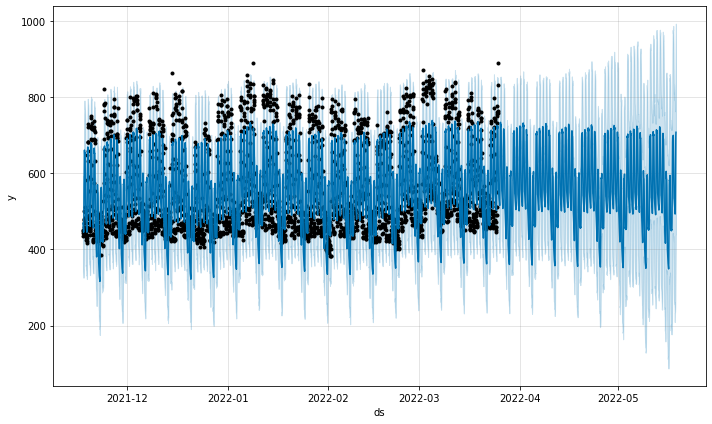

In [8]:
fig = m.plot(fcst);

In [9]:
p = go.Figure()
p.add_trace(go.Scatter(
    x = df.ds,
    y = df.y,
    mode = "lines",
    line = dict(color = "dodgerblue"),
    name = "original ts"
))
p.add_trace(go.Scatter(
    x = fcst.ds,
    y = fcst.yhat,
    mode = "lines",
    line = dict(color = "fuchsia"),
    name = "prediction (y_hat)"
))

p.show()

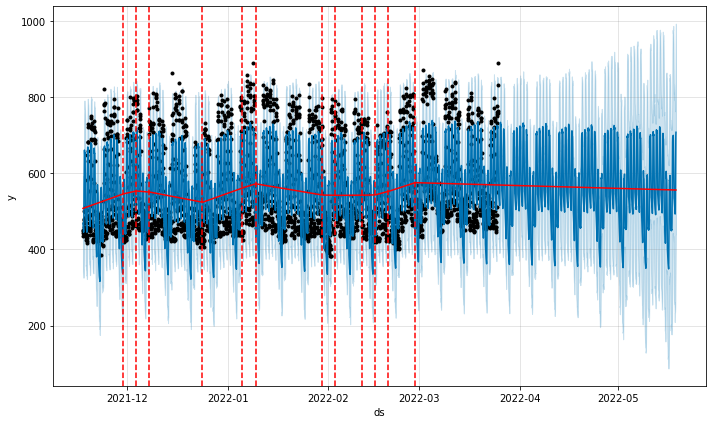

In [10]:
### Change Points
from prophet.plot import add_changepoints_to_plot

a = add_changepoints_to_plot(fig.gca(),m, fcst)
fig

In [11]:
# Mean squared error
from sklearn.metrics import mean_squared_error
print(f"Mean squared error : {mean_squared_error(y_true=df.y, y_pred = fcst.yhat)}")

Mean squared error : 5419.52276827911


## Predicting differenced values (lag1)
Predicting the difference between successive points instead of the values themeselves

In [13]:
df2 = df.copy()
df2["y"] = df["y"].diff()


In [14]:
px.line(df2, x = "ds", y = "y")

In [15]:
px.histogram(df2,x = "y",marginal = "violin")

In [16]:
df2_train = df2[:-test_size]
df2_test = df2[-test_size:]

print(f"df_train shape : {df_train.shape}")
print(f"df_test shape : {df_test.shape}")

df_train shape : (3066, 2)
df_test shape : (1314, 2)


In [19]:
m2 = Prophet(interval_width=0.95)
m2.fit(df2)
future2 = m2.make_future_dataframe(periods = test_size, freq="H")
fcst2 = m2.predict(future2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -26.6136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       8643.18   0.000191428       101.838           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118        8643.3   0.000117072       129.287   1.075e-06       0.001      187  LS failed, Hessian reset 
     199       8643.45   1.94876e-06       94.0077      0.2378      0.2378      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       8643.45   3.98634e-07       89.3406      0.7156      0.7156      307   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [20]:
fcst2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-17 12:00:00,-0.100461,-82.674753,61.813851,-0.100461,-0.100461,-9.997568,-9.997568,-9.997568,-10.088821,-10.088821,-10.088821,0.091253,0.091253,0.091253,0.0,0.0,0.0,-10.098029
1,2021-11-17 13:00:00,-0.100289,-82.257162,64.332869,-0.100289,-0.100289,-7.480705,-7.480705,-7.480705,-7.460677,-7.460677,-7.460677,-0.020028,-0.020028,-0.020028,0.0,0.0,0.0,-7.580994
2,2021-11-17 14:00:00,-0.100118,-72.274635,67.421434,-0.100118,-0.100118,-3.388206,-3.388206,-3.388206,-3.275602,-3.275602,-3.275602,-0.112604,-0.112604,-0.112604,0.0,0.0,0.0,-3.488324
3,2021-11-17 15:00:00,-0.099946,-77.825517,65.561177,-0.099946,-0.099946,-3.330261,-3.330261,-3.330261,-3.143783,-3.143783,-3.143783,-0.186478,-0.186478,-0.186478,0.0,0.0,0.0,-3.430207
4,2021-11-17 16:00:00,-0.099774,-75.861209,58.407263,-0.099774,-0.099774,-5.840016,-5.840016,-5.840016,-5.598146,-5.598146,-5.598146,-0.241870,-0.241870,-0.241870,0.0,0.0,0.0,-5.939791


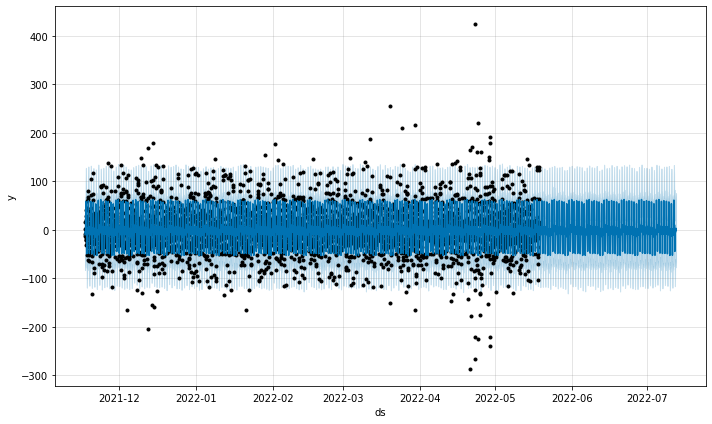

In [21]:
m2.plot(fcst2);

In [22]:
p2 = go.Figure()
p2.add_trace(go.Scatter(
    x = df2.ds,
    y = df2.y,
    mode = "lines",
    line = dict(color = "darkcyan"),
    name = "original ts"
))
p2.add_trace(go.Scatter(
    x = fcst2.ds,
    y = fcst2.yhat,
    mode = "lines",
    line = dict(color = "indianred"),
    name = "prediction"
))

# Predicting daily values
Explore if daily values are easier to predict that hourly values
 

In [31]:
df3 = df.copy()
df3 = df3.groupby(by = df3.ds.dt.date).mean()
df3.reset_index(level=0,inplace = True)
df3.head()

,ds,y
0,2021-11-17,457.916667
1,2021-11-18,487.250000
2,2021-11-19,556.875000
3,2021-11-20,564.375000
4,2021-11-21,513.416667


In [32]:
px.line(df3, x = "ds", y = "y")

In [33]:
px.histogram(df3, x = "y", marginal = "violin")

In [39]:
# Prediction
test_size3 = int(0.2 * df3.shape[0])
df3_train = df3[:-test_size3]
df3_test = df3[-test_size3:]

print(f"df train shape : {df3_train.shape}")
print(f"df test shape : {df3_test.shape}")

df train shape : (147, 2)
df test shape : (36, 2)


In [44]:
m3 = Prophet(interval_width=0.95)
m3.fit(df3_train)
future3 = m3.make_future_dataframe(periods = test_size3) # no need to add frequncy as by default considers daily values
fcst3 = m3.predict(future3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/imantha/Software/miniforge3/envs/tsEnv/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Initial log joint probability = -3.29363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      26       381.824   0.000129348       66.8659   2.586e-06       0.001       84  LS failed, Hessian reset 
      86       382.151   0.000461707       78.3216   5.586e-06       0.001      194  LS failed, Hessian reset 
      99       382.181   2.49164e-05       74.3598           1           1      215   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     137       382.191   1.39354e-05       77.9693   1.717e-07       0.001      298  LS failed, Hessian reset 
     199       382.195   3.69902e-08       64.4164      0.5451    0.005451      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       382.195   2.32189e-07       61.5749   3.174e-09       0.001      431  LS failed, Hessian reset 
     214       382.195   6.51755e-09       72.3798      0.2785   

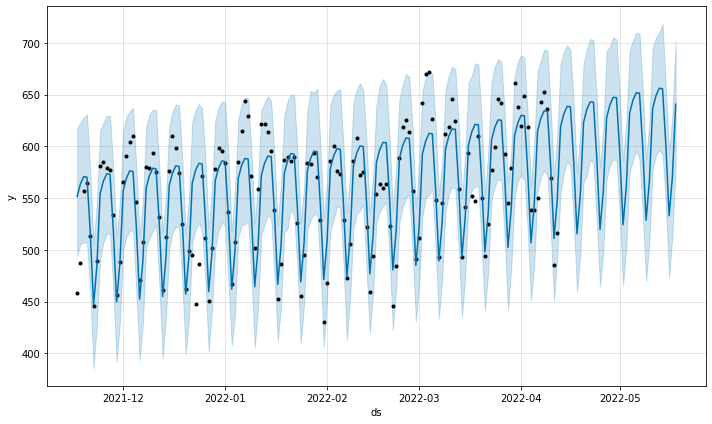

In [45]:
m3.plot(fcst3);

In [55]:
p3 = go.Figure()
p3.add_trace(go.Scatter(
    x = df3.ds,
    y = df3.y,
    mode = "lines",
    name = "original ts"
))
p3.add_trace(go.Scatter(
    x = fcst3.ds,
    y = fcst3.yhat,
    mode = "lines",
    line = dict(color = "indianred"),
    name = "prediction"
))

p3.show()